In [1]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.simplefilter('ignore')

### random vs. numpy speed copmarisons

In [2]:
def generate_numbers(start, end):
    numb = 1
    numbers = np.array([numb])
    for _ in range(start, end):
        numb *= 10
        numbers = np.concatenate([numbers, np.arange(numb, numb*10, numb)])
    return numbers


def measure_time_for_random_gen(numbers, module_type):
    time_measured = np.zeros(len(numbers))
    for i, numb in enumerate(numbers):
        start_time = time.time()
        if module_type == 'numpy':
            uniform_vals = np.random.uniform(size=numb)
        elif module_type == 'random':
            uniform_vals = [random.uniform(0, 1) for _ in range(numb)]
        total_time = time.time() - start_time
        time_measured[i] += total_time
    return time_measured


def plot_time_consumptions(numbers, time_measured_numpy, time_measured_random):
    max_time_numpy = round(max(time_measured_numpy), 4)
    max_time_random = round(max(time_measured_random), 4)
    with plt.xkcd():
        plt.figure(figsize=(14, 10));
        plt.plot(numbers, time_measured_numpy, color='red', label=f'numpy, max_time: {max_time_numpy} s.' );
        plt.plot(numbers, time_measured_random, color='green', label=f'random, max_time: {max_time_random} s.');
        plt.legend(fontsize=18);
        plt.xlabel('number of values generated', fontsize=16);
        plt.ylabel('time, seconds', fontsize=16);
        plt.xticks(fontsize=14);
        plt.yticks(fontsize=14);

        
def compare_random_vs_numpy(start, end):
    numbers = generate_numbers(start=start, end=end)
    time_measured_numpy = measure_time_for_random_gen(numbers=numbers, module_type='numpy')
    time_measured_random = measure_time_for_random_gen(numbers=numbers, module_type='random')
    plot_time_consumptions(numbers=numbers, time_measured_numpy=time_measured_numpy, 
                           time_measured_random=time_measured_random)

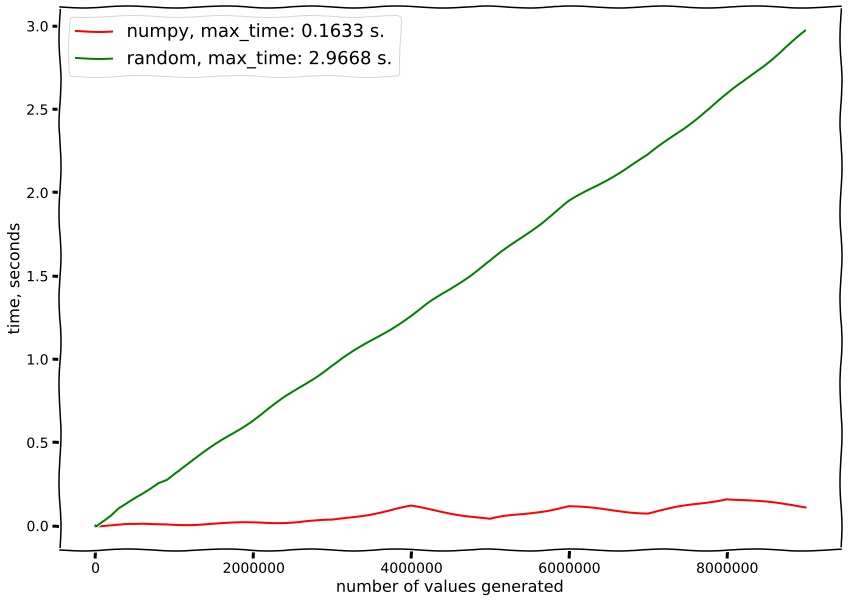

In [4]:
compare_random_vs_numpy(start=1, end=7)

### Monkey sorting

In [5]:
def is_sorted(arr):
    # Determine whether the data is sorted.
    return all(a <= b for a, b in zip(arr, arr[1:]))

def bogosort(arr):
    # Shuffle data until sorted.
    while not is_sorted(arr=arr):
        random.shuffle(arr)
    return arr


def measure_time(arr, n_iters):
    time_measures = np.zeros(n_iters)
    for i in range(n_iters):
        start_time = time.time()
        arr_sorted = bogosort(arr=arr)
        total_time = time.time()-start_time
        time_measures[i] += np.log2(total_time)
    return time_measures


def get_time_stats(lower_bound, upper_bound, max_arr_size, n_iters):    
    time_means = np.zeros(max_arr_size)
    time_vars = np.zeros(max_arr_size)
    for i in range(max_arr_size):
        #generate random array
        arr = np.random.randint(low=lower_bound, high=upper_bound, size=i)
        time_measures = measure_time(arr=arr, n_iters=n_iters)
        time_means[i] += np.mean(time_measures)
        time_vars[i] += np.std(time_measures)
    return time_means, time_vars


def plot_bosort_times(lower_bound, upper_bound, max_arr_size, n_iters):
    time_means, time_vars = get_time_stats(lower_bound=lower_bound, upper_bound=upper_bound, 
                                           max_arr_size=max_arr_size, n_iters=n_iters)
    with plt.xkcd():
        plt.figure(figsize=(12, 10))
        plt.scatter(np.arange(max_arr_size), time_means);
        plt.errorbar(np.arange(max_arr_size), time_means, yerr=time_vars);
        plt.xlabel('array size', fontsize=14)
        plt.ylabel('log2(time, seconds)', fontsize=14)
        plt.title('Monkey Sorting Runtime', fontsize=16)

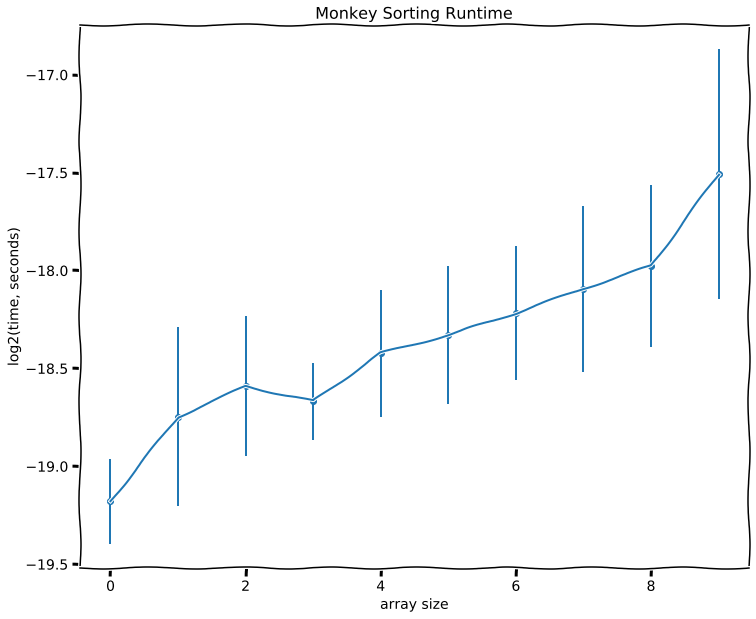

In [6]:
plot_bosort_times(lower_bound=0, upper_bound=50, max_arr_size=10, n_iters=1000)

### Random Walk

In [7]:
def generate_coordinates(n_steps, n_dims):
    init_coord = np.zeros((n_dims, 1))
    steps_available = [-1, 0, 1]
    steps_done = np.random.choice(steps_available, size=(n_dims, n_steps))
    coordinates = np.cumsum(steps_done, axis=1)
    coordinates = np.concatenate([init_coord, coordinates], axis=1)
    return coordinates


def plot_random_walk_1D(coordinates, n_steps):
    x = np.arange(1, n_steps+2).reshape(1, -1)
    plt.figure(figsize=(12, 8), dpi=300)
    plt.scatter(x[0][1:-1], coordinates[0][1:-1], s=0.025, alpha=0.25)
    plt.scatter(x[0][0], coordinates[0][0], marker='+', color='red', s=50, zorder=2)
    plt.scatter(x[0][-1], coordinates[0][-1], marker='o', color='black', s=50, zorder=2)
    plt.plot(x[0], coordinates[0], lw=0.5, ls='--', zorder=1)
    plt.xlabel('n_iter', fontsize=12);
    plt.title('1D Random Walk', fontsize=14);
    
    
def plot_random_walk_2D(coordinates, n_steps):
    x_coord = coordinates[0]
    y_coord = coordinates[1]
    plt.figure(figsize=(12, 8), dpi=300)
    plt.scatter(x_coord[1:-1], y_coord[1:-1], s=0.025, alpha=0.25)
    plt.scatter(x_coord[0], y_coord[0], marker='+', color='red', s=50, zorder=2)
    plt.scatter(x_coord[-1], y_coord[-1], marker='o', color='black', s=50, zorder=2)
    plt.plot(x_coord, y_coord, lw=0.5, ls='--', zorder=1)
    plt.xlabel('x coordinate', fontsize=12);
    plt.ylabel('y coordinate', fontsize=12);
    plt.title('2D Random Walk', fontsize=14);


def random_walk(n_steps, n_dims):
    coordinates = generate_coordinates(n_steps=n_steps, n_dims=n_dims)
    if n_dims == 1:
        plot_random_walk_1D(coordinates=coordinates, n_steps=n_steps)
    elif n_dims == 2:
        plot_random_walk_2D(coordinates=coordinates, n_steps=n_steps)

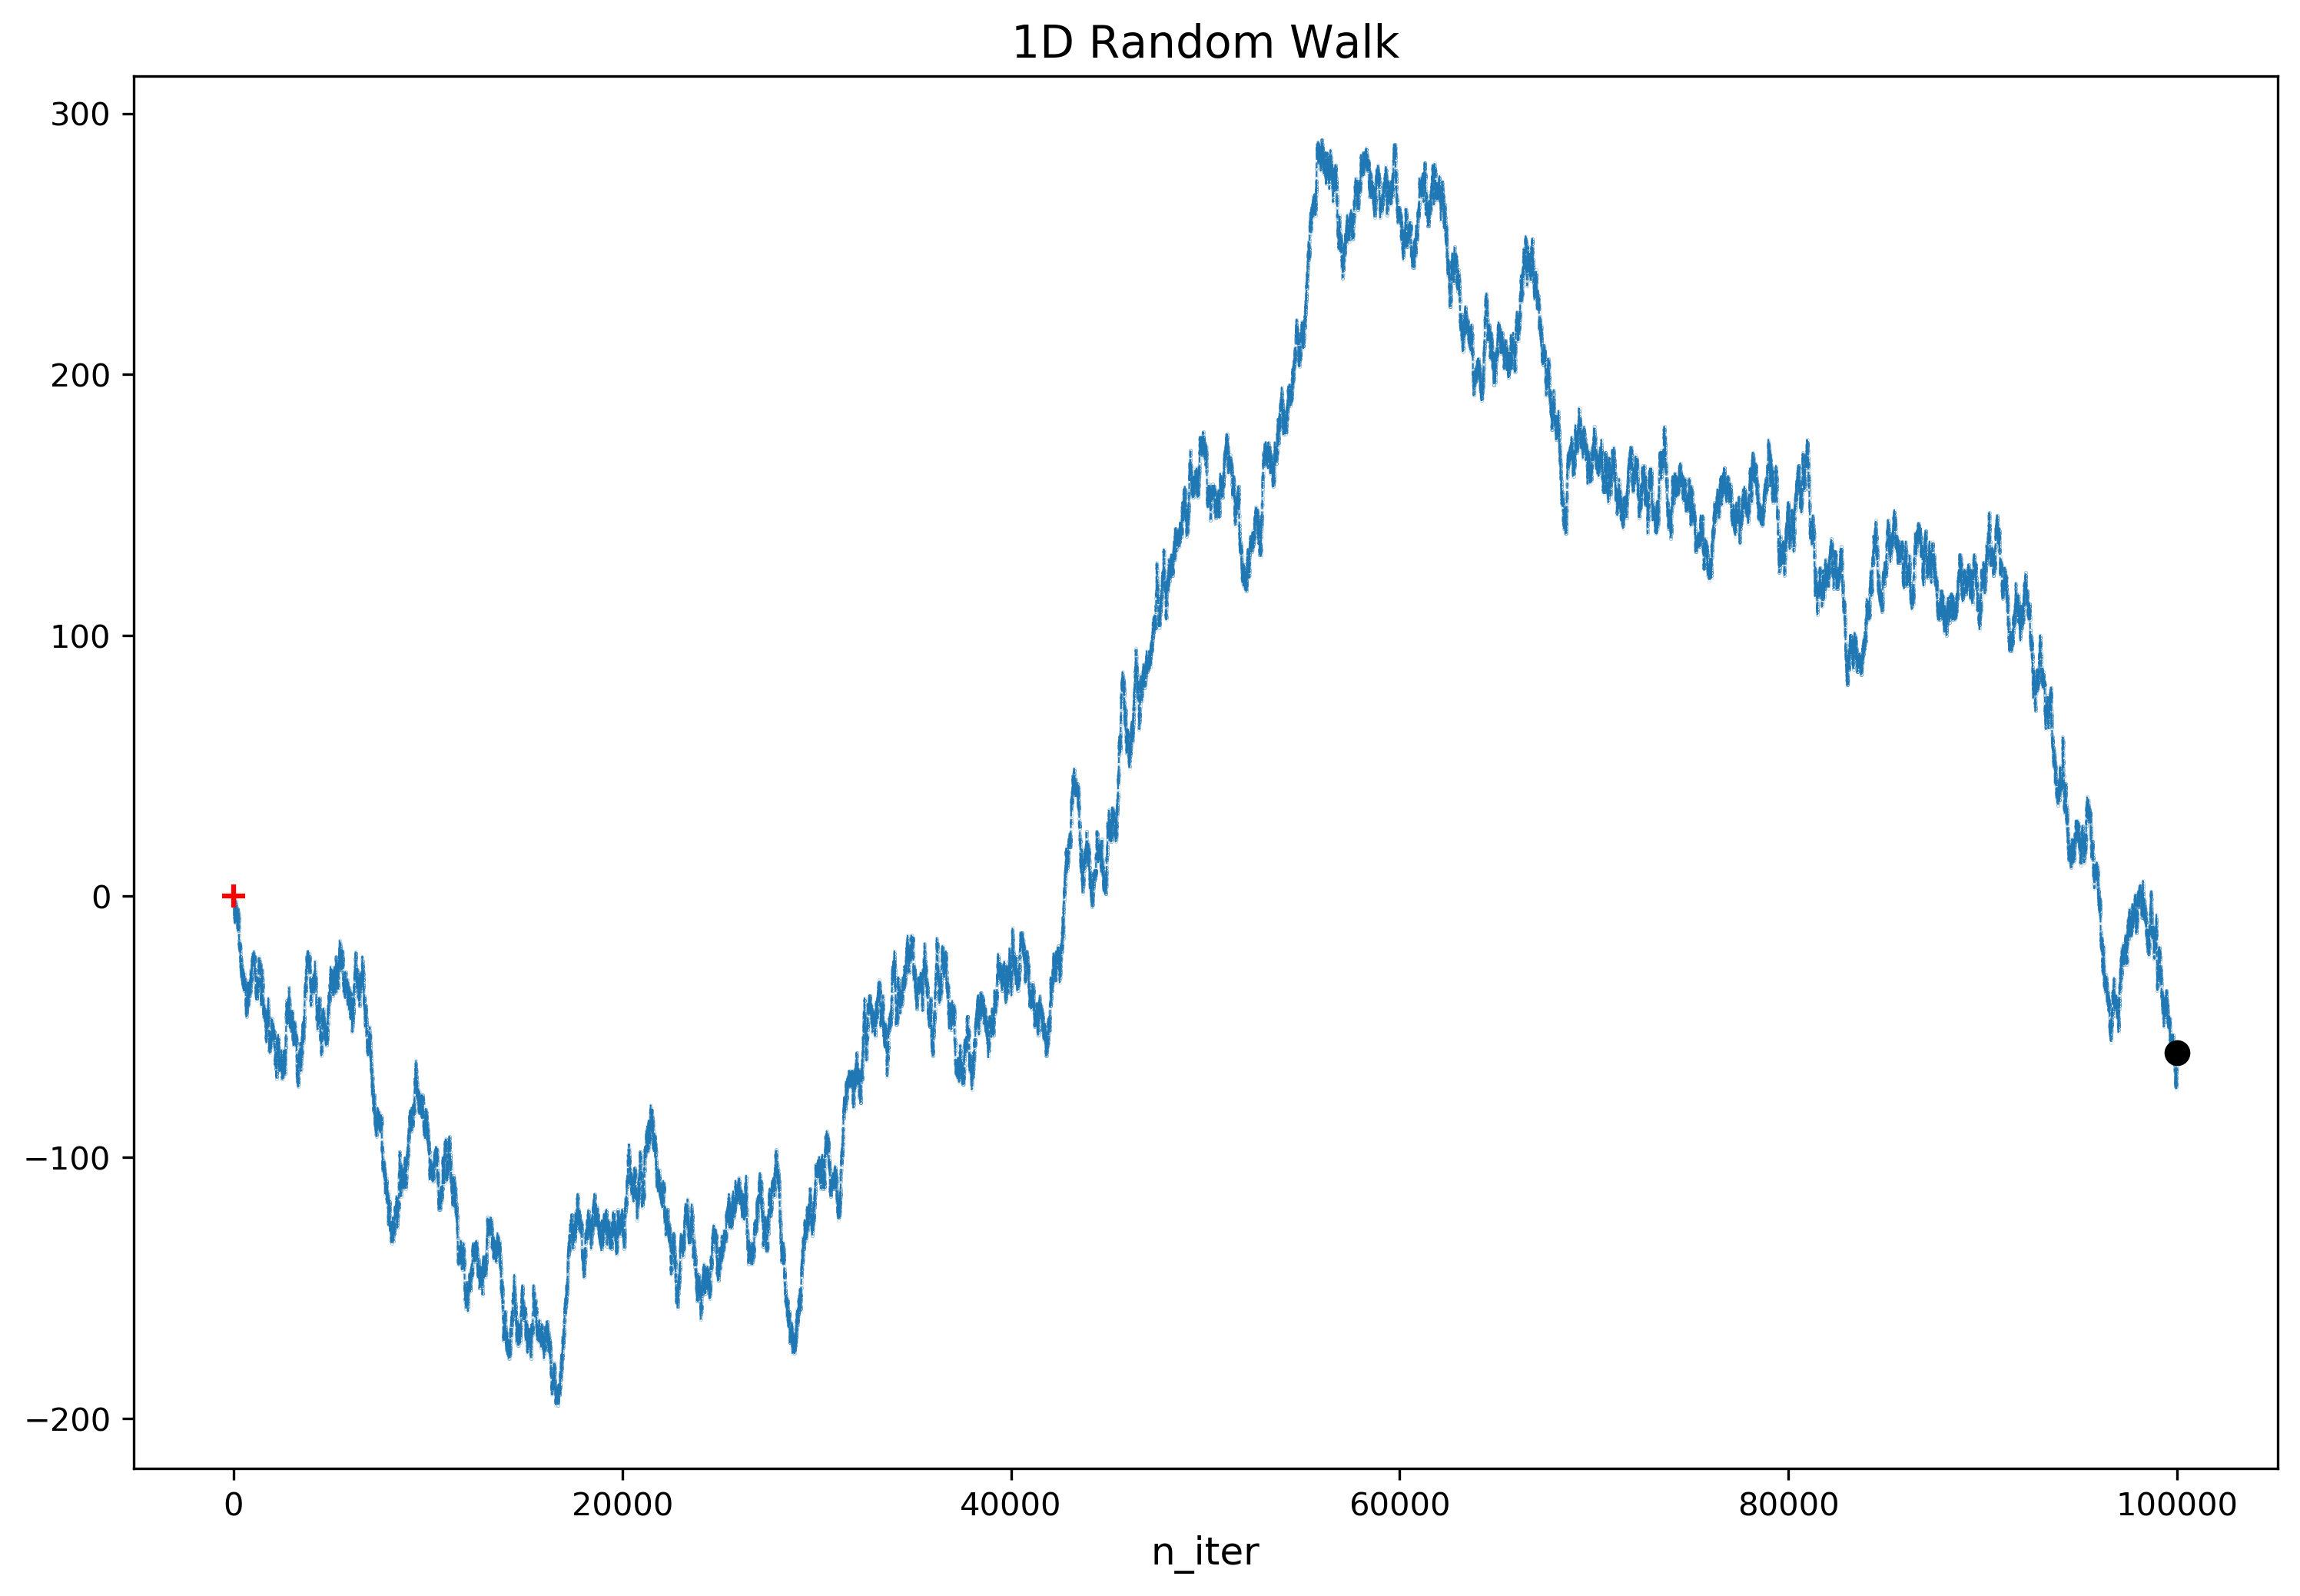

In [8]:
random_walk(n_steps=100000, n_dims=1)

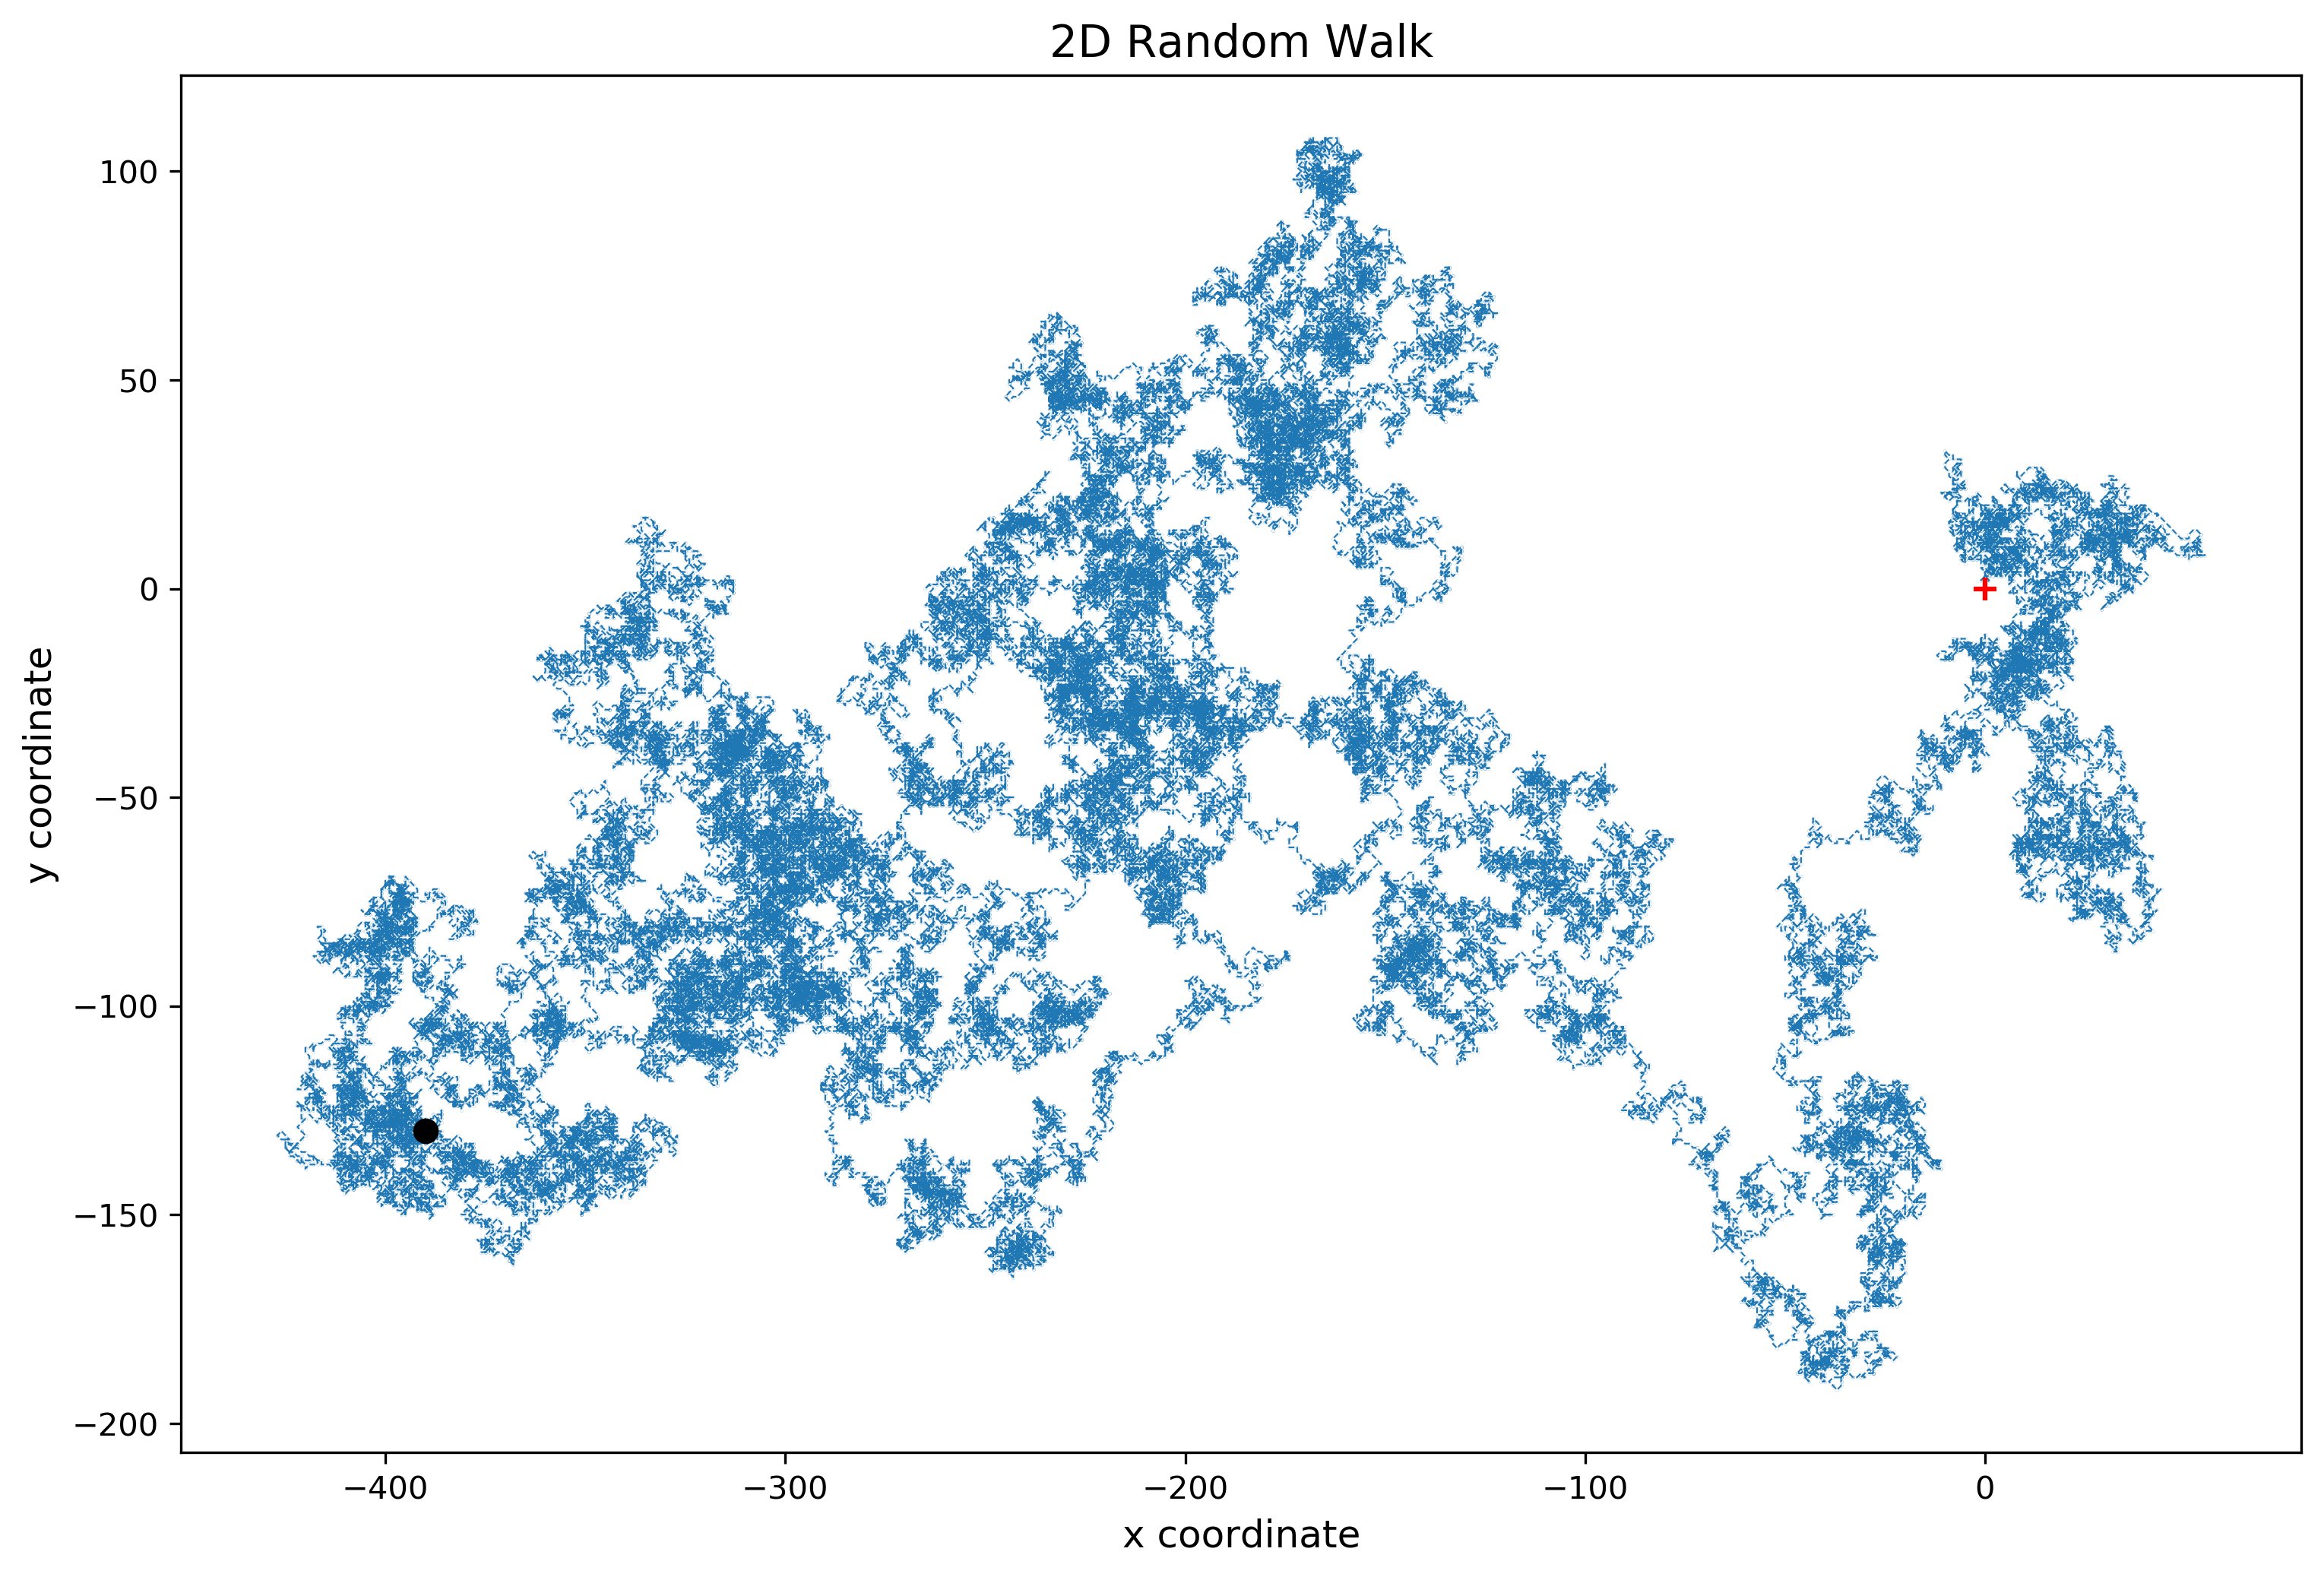

In [10]:
random_walk(n_steps=100000, n_dims=2)

### Sierpiński triangle 

In [11]:
def sierpinski_triangle(N):
    arr = np.zeros((N, N))
    points = np.array([(0, 0), (0, N), (N, N//2)])
    point = np.array((0, 0))
    for _ in range(N*1000):
        pos = np.random.randint(0, 3)
        point = (point + points[pos]) // 2
        arr[point[0]][point[1]] = 1

    plt.figure(figsize=(12, 12));
    plt.imshow(arr, origin='lower');

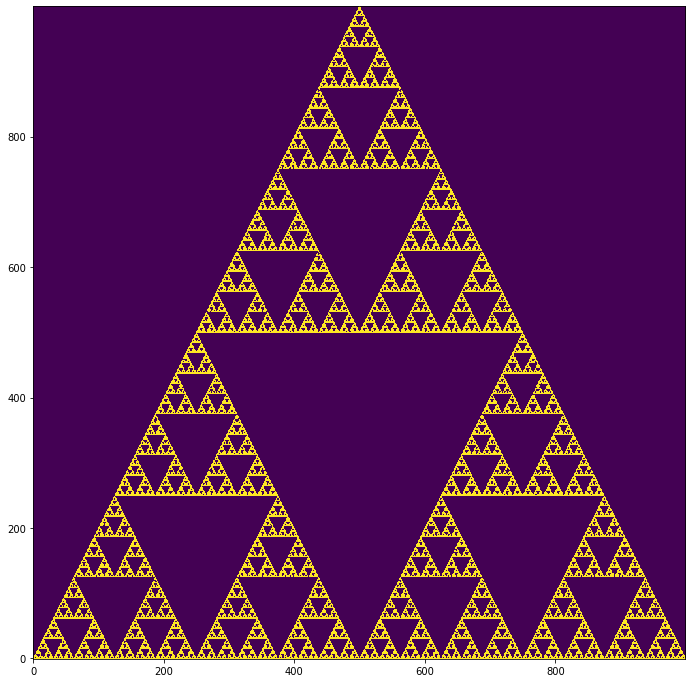

In [12]:
sierpinski_triangle(1000)

### Text shuffling

In [13]:
def text_shuffling(text):
    text_shuffled = []
    words = text.split()
    for word in words:
        first_letter = word[0]
        last_letter = word[-1]
        middle = list(word[1:-1])
        np.random.shuffle(middle)
        word_shuffled = first_letter + ''.join(middle) + last_letter
        text_shuffled.append(word_shuffled)
    return ' '.join(text_shuffled)

In [14]:
text = '''
    По результатам исследований одного анлийского университета не имеет значения 
    в каком порядке расположены буквы в слове
'''

In [15]:
text_shuffled = text_shuffling(text)
print(text_shuffled)

По ралатуезьтм иалоедснивсй огдоно ангйислкоо уртсеитнвеиа не иемет зчаиннея вв ккаом покядре рнаопжолесы бвукы вв солве
